# Content with notebooks

You can also create content with Jupyter Notebooks. This means that you can include
code blocks and their outputs in your book.

General imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import aplpy

Astropy imports

In [2]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astroquery.skyview import SkyView

## NGC 206 Finder Chart

INFO: Auto-setting vmin to  7.042e+03 [aplpy.core]
INFO: Auto-setting vmax to  3.022e+04 [aplpy.core]


<Figure size 1000x1000 with 0 Axes>

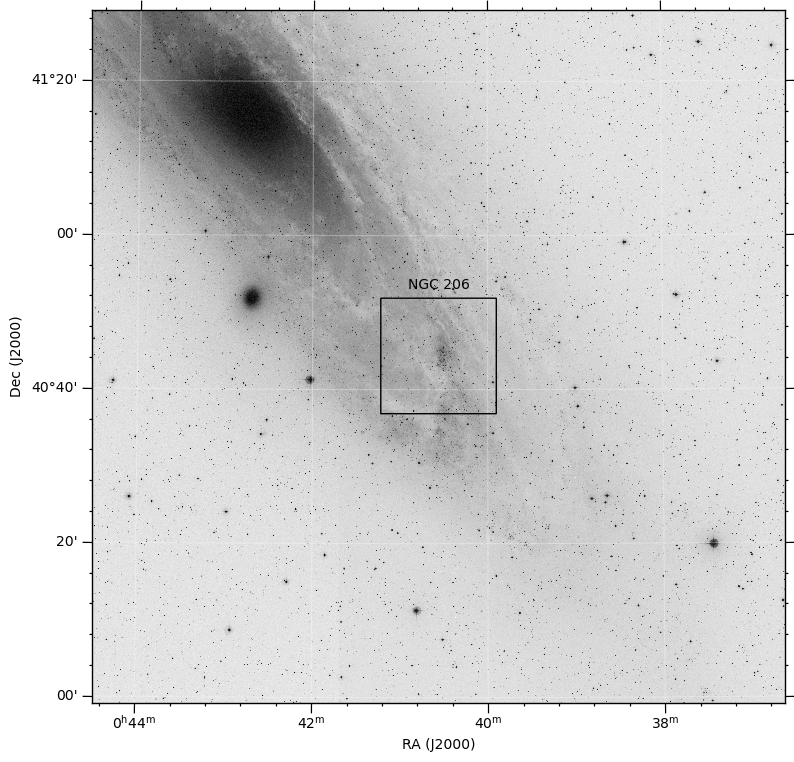

In [3]:
with fits.open('data/SkyView/NGC206_DSS2_B.fits') as NGC206_DSS:
    fig = plt.figure(figsize=(10,10))
    fig = aplpy.FITSFigure(NGC206_DSS)
    fig.set_theme('publication')
    # fig.set_title('NGC 206')
    fig.show_regions('data/ngc206.reg')
    fig.add_grid()
    fig.grid.set_alpha(0.3)
    fig.show_grayscale()
    # fig.savefig('plots/NGC206_DSS2_B.pdf')

Plot with WCS cutout

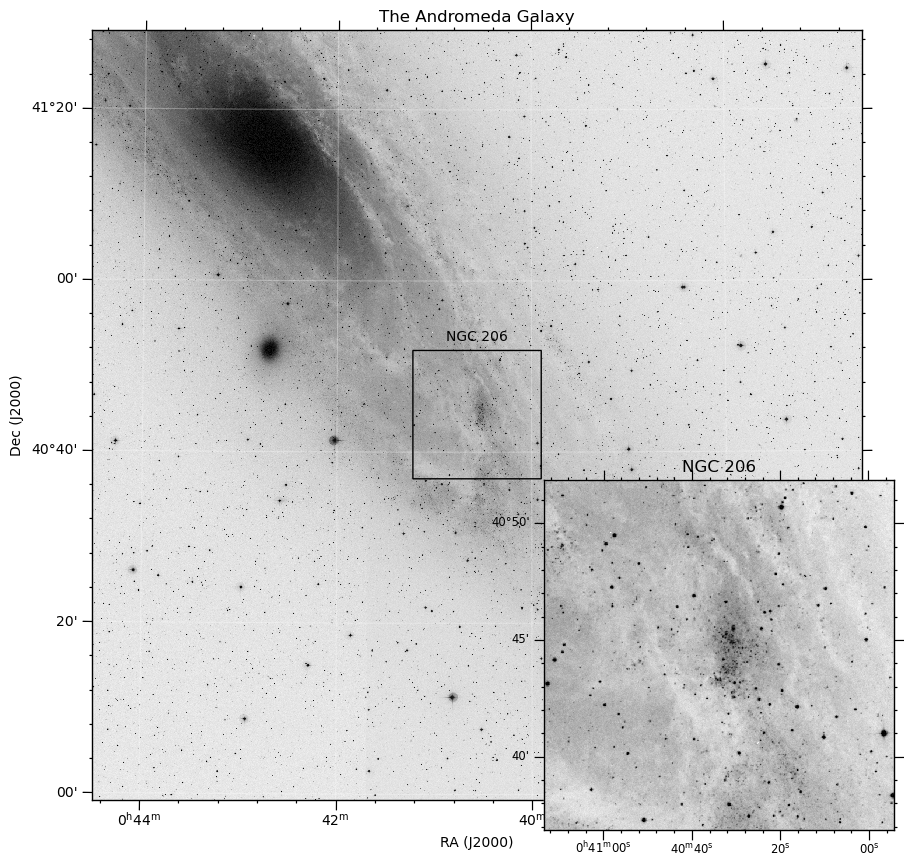

In [4]:
with fits.open('data/SkyView/NGC206_DSS2_B.fits') as NGC206_DSS:
    fig = plt.figure(figsize=(10,10))
    f1 = aplpy.FITSFigure(NGC206_DSS, figure=fig)
    f1.set_theme('publication')
    f1.set_title('The Andromeda Galaxy')
    f1.show_grayscale(vmin=7.382e+03, vmax=2.933e+04)
    f1.show_regions('data/ngc206.reg')
    f1.add_grid()
    f1.grid.set_alpha(0.3)
    
    position = SkyCoord(NGC206_DSS[0].header['CRVAL1']*u.deg,
                        NGC206_DSS[0].header['CRVAL2']*u.deg)
    size = 600*u.pixel # 1.5 arcsec/pix
    wcs = WCS(NGC206_DSS[0].header)
    cutout = Cutout2D(NGC206_DSS[0].data, position ,size, wcs = wcs)
    NGC206_cutout = fits.PrimaryHDU(cutout.data)
    NGC206_cutout.header.update(cutout.wcs.to_header())

    f2 = aplpy.FITSFigure(NGC206_cutout, figure=fig,
                       subplot=[0.58,0.08,0.35,0.35])
    f2.set_title('NGC 206')
    f2.set_theme('publication')
    f2.axis_labels.hide()
    f2.tick_labels.set_font(size='small')
    f2.show_grayscale(vmin=1.025e+04, vmax=2.694e+04)

    #fig.savefig('plots/NGC206_DSS2_B_Preview.pdf')

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)